#IMPORT LIBRARY

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#DECLARE DATA

In [26]:
data = np.array([[4.,1], [2,4], [2,3], [4,4], [9,10], [6,8], [9,5], [8,7], [10,8]])
data

array([[ 4.,  1.],
       [ 2.,  4.],
       [ 2.,  3.],
       [ 4.,  4.],
       [ 9., 10.],
       [ 6.,  8.],
       [ 9.,  5.],
       [ 8.,  7.],
       [10.,  8.]])

#CALC MEANS




In [27]:
mean1 = []
mean2 = []
mean1.append(np.mean(data[:4,0]))
mean1.append(np.mean(data[:4,1]))
mean2.append(np.mean(data[4:,0]))
mean2.append(np.mean(data[4:,1]))
print(mean1,mean2)

[3.0, 3.0] [8.4, 7.6]


#MAKE DATA MEAN CENTRIC

(9, 2)


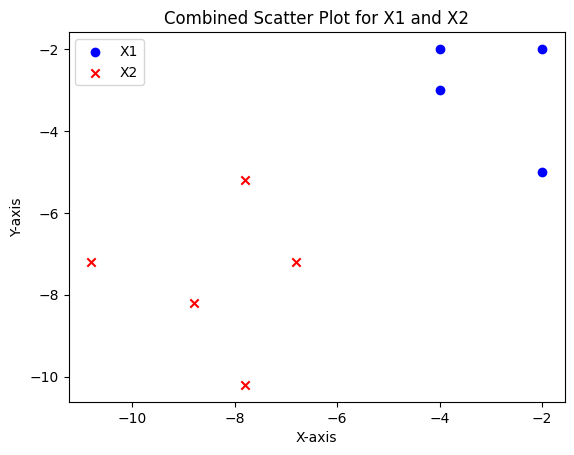

In [47]:
print(data.shape)
# data1 = np.zeros((9,2))
data[:4,0] = data[:4,0] - mean1[0]
data[:4,1] = data[:4,1] - mean1[1]
data[4:,0] = data[4:,0] - mean2[0]
data[4:,1] = data[4:,1] - mean2[1]
# Scatter plot the data for both classes on the same graph
plt.scatter(data[:4, 0], data[:4, 1], color='blue', marker='o', label='X1')
plt.scatter(data[4:, 0], data[4:, 1], color='red', marker='x', label='X2')

# Add a legend to differentiate between the classes
plt.legend()

# Display the plot
plt.title("Combined Scatter Plot for X1 and X2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

#DEFINE S1,S2

In [48]:
s1 = np.zeros((4,2))
s2 = np.zeros((5,2))
s1[:4,0] = data[:4,0]
s1[:4,1] = data[:4,1]
s2[:5,0] = data[4:,0]
s2[:5,1] = data[4:,1]
s1_t = np.transpose(s1)
s2_t = np.transpose(s2)
s1 = s1_t@s1
s2 = s2_t@s2
print(s1)
print(s2)

[[40. 34.]
 [34. 42.]]
[[362. 319.]
 [319. 302.]]


#DEFINE SW

In [49]:
sw= s1 + s2
sw_inv = np.linalg.inv(sw)

#DEFINE SB

In [50]:
m = [0,0]
m[0] = mean1[0] - mean2[0]
m[1] = mean1[1] - mean2[1]
m = np.array([[m[0]],[m[1]]])
m_t = m.transpose()
sb = m@m_t
sb

array([[29.16, 24.84],
       [24.84, 21.16]])

#FIND EIG VECTOR

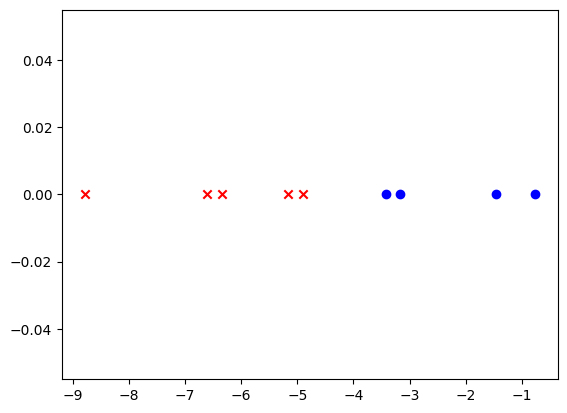

In [51]:
c = sw_inv@sb
value, vec = np.linalg.eig(c)
pts = []
for d in data:
  pts.append(vec[0,0]*d[0] + vec[1,0]*d[1])

plt.scatter(pts[:4],[0 for _ in range(len(pts[:4]))],color='blue', marker='o', label='X1')
plt.scatter(pts[4:],[0 for _ in range(len(pts[4:]))],color='red', marker='x', label='X2')